# Not working

In [1]:
file_input, cube_size = 'input_test.txt', 4
#file_input, cube_size = 'input.txt', 50

In [2]:
import numpy as np

In [3]:
with open(file_input) as f:
    filetxt = f.read()

In [4]:
map,moves = filetxt.split('\n\n')

In [5]:
map = map.split('\n')

In [6]:
map

['        ...#',
 '        .#..',
 '        #...',
 '        ....',
 '...#.......#',
 '........#...',
 '..#....#....',
 '..........#.',
 '        ...#....',
 '        .....#..',
 '        .#......',
 '        ......#.']

In [7]:
moves=moves.strip('\n')

In [8]:
moves

'10R5L5R10L4R5L5'

In [9]:
#Test splitting the moves
import re
re.findall( "[R|L]|[0-9]+", moves)

['10', 'R', '5', 'L', '5', 'R', '10', 'L', '4', 'R', '5', 'L', '5']

In [10]:
moves_list = re.findall( "[R|L]|[0-9]+", moves)
moves_list

['10', 'R', '5', 'L', '5', 'R', '10', 'L', '4', 'R', '5', 'L', '5']

# Parse map

Convert map to a numpy array of int8

In [11]:
VOID=0
TILE=1
WALL=2

In [12]:
conv_dict={' ':VOID , '.':TILE , '#':WALL}

need to figure out dimensions of the map

In [13]:
ysize = len(map)
ysize

12

In [14]:
xsize=0
for l0 in map:
    lsize = len(l0)
    xsize=max(xsize,lsize)
xsize

16

Create array with these dimensions and fill with the elements

In [15]:
map_np = np.zeros((ysize,xsize), dtype=np.int8)

for iy, l0 in enumerate(map):
    for ix,char in enumerate(l0):
        map_np[iy,ix] = conv_dict[char]

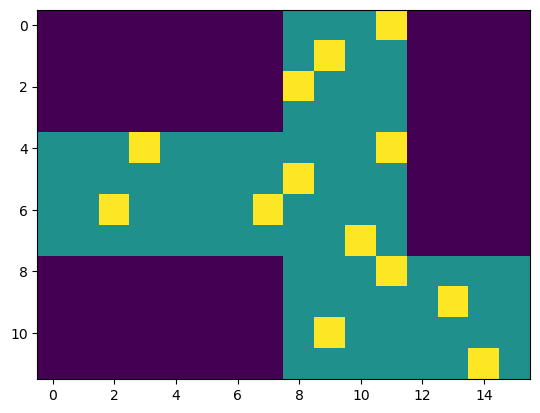

In [16]:
import matplotlib.pyplot as plt
plt.imshow(map_np)

Get starting position. This is the top line, the first time a free tile appears

In [17]:
ystart=0
xstart=0
topline = map_np[0,:]

In [17]:
topline

NameError: name 'topline' is not defined

In [ ]:
xstart=np.nonzero(np.logical_and(topline[0:-1]==VOID, topline[1:]==TILE) )[0][0]+1
xstart

50

Setup directions

In [18]:
DIR_UP=(-1,0)
DIR_DOWN=(1,0)
DIR_LEFT=(0,-1)
DIR_RIGHT=(0,1)

In [19]:
Lrot_dict={DIR_UP:DIR_LEFT , DIR_DOWN:DIR_RIGHT , DIR_LEFT:DIR_DOWN , DIR_RIGHT:DIR_UP} #counterclockwise
Rrot_dict={DIR_UP:DIR_RIGHT , DIR_DOWN:DIR_LEFT , DIR_LEFT:DIR_UP , DIR_RIGHT:DIR_DOWN} #clockwise

# Setup the cubefaces

Check notebook for details

In [33]:
#Get the order of face locations along row
face_locations = [
    [0,1,2,3],
    [5,1,4,3],
    [2,1,0,3],
    [4,1,5,3]
    ]

#Clockwise rotations
face_C_rots = [
    [0,0,0,0],
    [0,1,2,3],
    [2,2,2,2],
    [0,3,2,1]
    ]

In [55]:
cubefaces = []
cubefaces_mappos = [0,0,0,0,0,0]
cubeface_rotapplied = [0,0,0,0,0,0]
starting_face = -1

#Initialise
for i in range(6):
    cubeface0 = np.zeros((cube_size, cube_size), dtype=np.int8)
    cubefaces.append(cubeface0)
    cubefaces_mappos

for iy in range(0, map_np.shape[0], cube_size):
    for ix in range( 0, map_np.shape[1], cube_size):
        face = map_np[iy:iy+cube_size , ix:ix+cube_size]

        if face[0,0]!=VOID:
            #Valid face, add to cubeface at the right location
            row = (iy//cube_size) %4
            col = (ix//cube_size) %4

            fl = face_locations[row][col]
            fcr = face_C_rots[row][col]

            if row==0 and starting_face==-1:
                starting_face=fl

            print(f"face found, iy:{iy} , ix:{ix} , fl:{fl} , fcr:{fcr}")
            face_rot = np.rot90(face,k=-fcr)
            #Add element
            cubefaces[fl] = face_rot
            cubefaces_mappos[fl]= [iy,ix]
            cubeface_rotapplied[fl]=fcr


face found, iy:0 , ix:8 , fl:2 , fcr:0
face found, iy:4 , ix:0 , fl:5 , fcr:0
face found, iy:4 , ix:4 , fl:1 , fcr:1
face found, iy:4 , ix:8 , fl:4 , fcr:2
face found, iy:8 , ix:8 , fl:0 , fcr:2
face found, iy:8 , ix:12 , fl:3 , fcr:2


In [56]:
cubefaces

[array([[1, 1, 1, 1],
        [1, 1, 2, 1],
        [1, 1, 1, 1],
        [2, 1, 1, 1]], dtype=int8),
 array([[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 2, 1, 1]], dtype=int8),
 array([[1, 1, 1, 2],
        [1, 2, 1, 1],
        [2, 1, 1, 1],
        [1, 1, 1, 1]], dtype=int8),
 array([[1, 2, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 2, 1],
        [1, 1, 1, 1]], dtype=int8),
 array([[1, 2, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 2],
        [2, 1, 1, 1]], dtype=int8),
 array([[1, 1, 1, 2],
        [1, 1, 1, 1],
        [1, 1, 2, 1],
        [1, 1, 1, 1]], dtype=int8)]

In [57]:
cubefaces_mappos

[[8, 8], [4, 4], [0, 8], [8, 12], [4, 8], [4, 0]]

In [60]:
cubeface_rotapplied

[2, 1, 0, 2, 2, 0]

In [61]:
starting_face

2

# Algorithm

Need to modify the DoStep so that takes into account the cube folding

In [62]:
def doStep(pos0, dir0):
    #Check against map if one step of the move is possible
    y = pos0[0] #new positons start
    x = pos0[1]

    sizey, sizex = map_np.shape
    isVoid=True

    while isVoid:
        #Move one step
        y+=dir0[0]
        x+=dir0[1]

        if x<0: x=sizex-1
        if x>=sizex: x=0
        if y<0: y=sizey-1
        if y>=sizey: y=0

        #Check if it is wall
        if map_np[y,x] == WALL:
            return None #Cannot move, so stop
        elif map_np[y,x] == VOID:
            isVoid=True
        else:
            isVoid=False

    assert map_np[y,x] == TILE

    return [y,x]

In [63]:
def doStepCube(pos0, face_number, dir0):

    #pos is position within the face_number given

    y = pos0[0] #new positons start
    x = pos0[1]

    new_face_number = face_number

    newdir = dir0

    #sizey, sizex = cube_size

    #isVoid=True #There is no void this time

    #Move one step
    y+=dir0[0]
    x+=dir0[1]

    #Check for over-the-edge movement
    # If goes over the edge, then move it to new face and adjust direction
    
    if x<0:
        assert dir0==DIR_LEFT
        if 1<=face_number<=3:
            #Just move to lower face number, keep direction, and adjust x
            new_face_number-=1
            x = cube_size-1
        if face_number==0:
            new_face_number=3
            x = cube_size-1
        if face_number==4:
            #Emerges from top of 3
            new_face_number=3
            x=y
            y=0
            newdir=DIR_DOWN
        if face_number==5:
            #Emerges from bottom of 3
            new_face_number=3
            x=cube_size-1-y #note the subtraction
            y=cube_size-1
            newdir=DIR_UP
    
    if x>=cube_size:
        assert dir0==DIR_RIGHT
        if 0<=face_number<=2:
            #move to higher face number, keep direction, and adjust x
            new_face_number+=1
            x=0
        if face_number==3:
            new_face_number=0
            x=0
        if face_number==4:
            #emerges from top of 1
            new_face_number=1 #Emerges from top of 1
            x=cube_size-1-y
            y=0
            newdir=DIR_DOWN
        if face_number==5:
            #emerges from bottom of 1
            new_face_number=1 #Emerges from bottom of 1
            x=y
            y=cube_size-1
            newdir=DIR_UP

    if y<0:
        assert dir0==DIR_UP
        if face_number==0:
            new_face_number=4
            y=cube_size-1
        if face_number==5:
            new_face_number=0
            y=cube_size-1

        if face_number==4:
            #Emerges from the top of 2
            new_face_number=2
            y=0
            x=cube_size-1-x
            newdir=DIR_DOWN
        if face_number==1:
            #Emerges from the right side of 4
            new_face_number=4
            y=cube_size-1-x
            x=cube_size-1
            newdir=DIR_LEFT
        if face_number==2:
            #Emerges from the top side of 4
            new_face_number=4
            y=0
            x=cube_size-1-x
            newdir=DIR_DOWN
        if face_number==3:
            #Emerges from the left side of 3
            new_face_number=4
            y=x
            x=0
            newdir=DIR_RIGHT
        
    if y>=cube_size:
        assert dir0==DIR_DOWN

        if face_number==4:
            new_face_number=0
            y=0
        if face_number==0:
            new_face_number=5
            y=0

        if face_number==5:
            #Emerges from the bottom of 2
            new_face_number=2
            x=cube_size-1-x
            y=cube_size-1
            newdir=DIR_UP
        if face_number==1:
            # Emerges from the right of 5
            new_face_number=5
            y=x
            x=cube_size-1
            newdir=DIR_LEFT

        if face_number==2:
            # Emerges from the bottom of 5
            new_face_number=5
            x=cube_size-1-x
            y=cube_size-1
            newdir=DIR_UP

        if face_number==3:
            # Emerges from the left of 5
            new_face_number=5
            y=cube_size-1-x
            x=0
            newdir=DIR_RIGHT

    newface = cubefaces[new_face_number]

    #Check if it is wall
    if newface[y,x] == WALL:
        return None #Cannot move, so stop

    assert newface[y,x] == TILE


    #Return new position, new direction and face
    return [y,x] , new_face_number, newdir

In [64]:
#Starting position and direction
my_pos = [0, 0]
my_face = starting_face
my_dir = DIR_RIGHT

print(f"starting location, face:{my_face}, pos:{my_pos}, direction:{my_dir}")
for m0 in moves_list:
    #print(f"Move {m0}")
    if m0.isnumeric():
        #Makes the move N times
        steps = int(m0)
        #print(f"Numeric move, steps {steps}")
        for i in range(steps):
            #print(f"i:{i}")
            res = doStepCube(my_pos,my_face, my_dir)
            #print(f"res:{res}")
            if res is None:
                break
            else:
                my_pos, my_face, my_dir = res

    else:
        #Instruction is a turn
        if m0=='R':
            #Clockwise
            newdir = Rrot_dict[my_dir]
        else:
            assert m0=='L'
            newdir= Lrot_dict[my_dir]
        my_dir=newdir
    print(f"position after move, face:{my_face}, pos:{my_pos}, direction:{my_dir}")

starting location, face:2, pos:[0, 0], direction:(0, 1)
position after move, face:2, pos:[0, 2], direction:(0, 1)
position after move, face:2, pos:[0, 2], direction:(1, 0)
position after move, face:5, pos:[2, 1], direction:(-1, 0)
position after move, face:5, pos:[2, 1], direction:(0, -1)
position after move, face:3, pos:[1, 1], direction:(-1, 0)
position after move, face:3, pos:[1, 1], direction:(0, 1)
position after move, face:0, pos:[1, 1], direction:(0, 1)
position after move, face:0, pos:[1, 1], direction:(-1, 0)
position after move, face:4, pos:[1, 1], direction:(-1, 0)
position after move, face:4, pos:[1, 1], direction:(0, 1)
position after move, face:1, pos:[2, 2], direction:(1, 0)
position after move, face:1, pos:[2, 2], direction:(0, 1)
position after move, face:1, pos:[2, 3], direction:(0, 1)


In [67]:
#Convert position and face to map position
final_face = my_face
rot_to_rev = cubeface_rotapplied[final_face]

x0, y0 = my_pos
dir0 = my_dir
print(f"y0:{y0}, x0:{x0}, dir0:{dir0}")

#This time rotate coords clockwise to reverse
for i in range(rot_to_rev):
    x_rot= y0
    y_rot = cube_size-1-x0
    x0=x_rot
    y0=y_rot

    dir0 = Rrot_dict[dir0]

print(f"After reversing rotation of face y0:{y0}, x0:{x0} , dir0:{dir0}")

#Get positon in map
face_mappos = cubefaces_mappos[final_face]
y1 = y0 + face_mappos[0]
x1 = x0 + face_mappos[1]
dir1= dir0

print(f"Final position in map y1:{y1}, x1:{x1} , dir1:{dir1}")

y0:3, x0:2, dir0:(0, 1)
After reversing rotation of face y0:1, x0:3 , dir0:(1, 0)
Final position in map y1:5, x1:7 , dir1:(1, 0)


In [68]:
score_dir_dict = {DIR_RIGHT:0, DIR_DOWN:1, DIR_LEFT:2, DIR_UP:3 }

In [135]:
row = pos[0]+1
col = pos[1]+1
dir_score = score_dir_dict[dir]

In [136]:
1000*row+4*col+dir_score

186128

OK